$\u03B1$

[0.002 0.04  0.1   0.2   0.3   0.4   0.6   0.8  ]


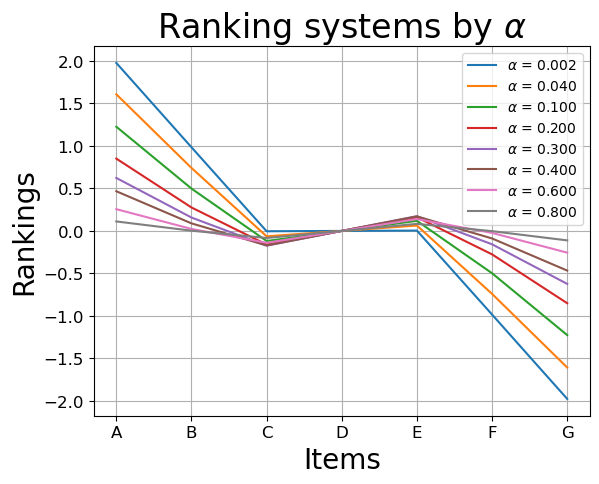

In [33]:
from Dual import Dual
from TI import TI
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt

#plot ranking systems around the exception for different n values

n_vals = [7,9,11,13,15]
p_vals = [5,6,7,8,9]
q_vals = [3,4,5,6,7]
k_o_vals = [0.499, 0.48, 0.45, 0.4, 0.35, 0.3, 0.2, 0.1]

alpha_vals = [1] * 8 - (2 * np.array(k_o_vals))
print(alpha_vals)

for j in range(len(k_o_vals)):
    i = 0 #fixed n
    sim = Ranking_exp(n=n_vals[i], k_o=k_o_vals[j], k_s=1, k_d=0, p=p_vals[i], q=q_vals[i], c_var=0)
    ranks = sim.calc_rank()  # Get rankings for current n
    mid = n_vals[i] // 2  # Midpoint of the ranking system
    x_vals = np.arange(-mid, n_vals[i] - mid)  # Center x-values around 0
    plt.plot(x_vals, ranks, label=f'$\u03B1$ = {alpha_vals[j]:.3f}')

# Add labels and legend
plt.title(r'Ranking systems by $\alpha$', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.xlabel('Items', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel('Rankings', fontdict={'fontsize': 20, 'fontweight': 'medium'})

plt.legend()
plt.grid(True)
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.xticks(ticks=x_vals, labels=letters, fontsize = 12)
plt.yticks(fontsize = 12)

# Save the plot
plt.savefig("ranking_systems_by_alpha_n_7.svg", format="svg")

# Show the plot
plt.show()


n = 7
p = 5
q = 3
0.11237233735157265
0.011351036164152966
0.0011380242899568938
2.9206735415982822e-05
-0.0008459569357970664
-0.008488776093386639
-0.08404180399806939
-1.1701712223837574e-06
0.08403010228584526
0.008374099313591284
-0.00028910914993232227
-0.011265190812914527
-0.11236279897921282


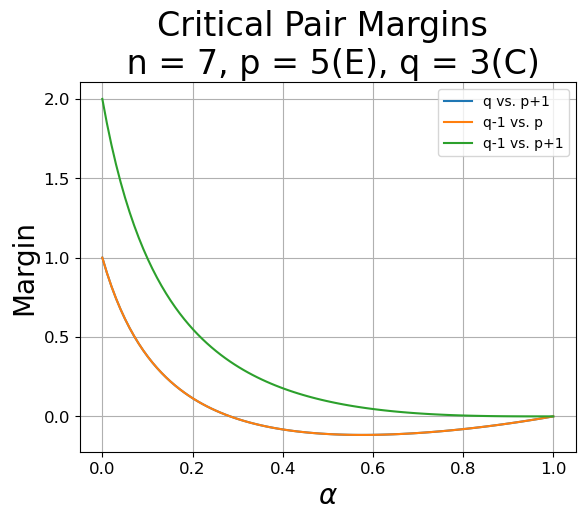

In [34]:
# TI-Trends-Plot

import numpy as np
from IPython.display import display, Math

def cosh(x):
    return np.cosh(x)

def sinh(x):
    return np.sinh(x)

def tanh(x):
    return np.tanh(x)

def acosh(x):
    return np.arccosh(x)

#first: k_o vs margin

#set parameters:
def set_parameters(n_val, p_val, q_val):
    global n, k_o, k_s, alpha, alpha_prime, p, q, c_var, lamb_val
    # Set variables globally
    n = n_val
    p = p_val
    q = q_val

#check parameters:
def check_parameters():
    print(f"n = {n}")
    print(f"p = {p}")
    print(f"q = {q}")

set_parameters(n_val=7, p_val=5, q_val=3)   
check_parameters()

def rank_original(j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    rank_original = sinh(((n+1)/2 - j) * lamb) / ( sinh(((n+1)/2) * lamb) - sinh(((n-1)/2) * lamb) )
    return rank_original


def get_c(k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    alpha_prime = k_o / 1
    num = 1 + (
        (sinh(((n + 1) / 2 - q) * lamb) - sinh(((n + 1) / 2 - p) * lamb)) 
        / (sinh(((n + 1) / 2) * lamb) - sinh(((n - 1) / 2) * lamb))
    )
    D_sim = (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )
    denom = ( 1 - 2*alpha_prime 
        - (4 * (1 / (2 * cosh(lamb))) * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) * D_sim ) 
    )
    return num/denom

def D_ij_analytical_sol_trend3(i, j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    num = 2 * cosh( (min(i,j)-1/2) * lamb ) * cosh( (n-(max(i,j)-1/2)) * lamb) * tanh(lamb/2)
    denom = sinh(lamb * n)
    return num/denom

def rank_diff(j, k_o):
    alpha = 1 - 2 * (k_o/1)
    lamb = acosh(1/(1-alpha))
    alpha_prime = k_o / 1
    rank_diff = get_c(k_o) * alpha_prime * (D_ij_analytical_sol_trend3(j, p, k_o) - D_ij_analytical_sol_trend3(j, q, k_o))
    return rank_diff

def rank(j, k_o): 
    return rank_original(j, k_o) + rank_diff(j, k_o)

def margin(j, k, k_o):
    return rank(j, k_o) - rank(k, k_o)


set_parameters(n_val=13, p_val=9, q_val=7)   

for i in range(1, n+1):
    print(rank(i, 0.1))

    #status:
# A: p+1 vs q
# B: p vs q-1
# C: q-1 vs p+1
# D: p vs q

p = 5
q = 3
n = 7
k_o = 0.4

k_o_array = np.linspace(0.00000000001, 0.49999999, 100)
alpha_array = 1 - 2 * k_o_array
margin_A = np.zeros(100)
margin_B = np.zeros(100)
margin_C = np.zeros(100)
margin_D = np.zeros(100)
for i in range(100):
    margin_A[i] = margin(q, p+1, k_o_array[i])
    margin_B[i] = margin(q-1, p, k_o_array[i])
    margin_C[i] = margin(q-1, p+1, k_o_array[i])
    margin_D[i] = margin(q, p, k_o_array[i])
    

import matplotlib.pyplot as plt
plt.plot(alpha_array, margin_A, label='q vs. p+1')
plt.plot(alpha_array, margin_B, label='q-1 vs. p')
plt.plot(alpha_array, margin_C, label='q-1 vs. p+1')
plt.legend()
plt.title(f'Critical Pair Margins \n n = 7, p = 5(E), q = 3(C)', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.xlabel('$\u03B1$', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel('Margin', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot
plt.savefig("TI_critical_pairs_margins_n_7.svg", format="svg")

plt.show()


In [35]:
print(alpha_array)

[1.00000000e+00 9.89898990e-01 9.79797980e-01 9.69696970e-01
 9.59595960e-01 9.49494950e-01 9.39393941e-01 9.29292931e-01
 9.19191921e-01 9.09090911e-01 8.98989901e-01 8.88888891e-01
 8.78787881e-01 8.68686871e-01 8.58585861e-01 8.48484851e-01
 8.38383842e-01 8.28282832e-01 8.18181822e-01 8.08080812e-01
 7.97979802e-01 7.87878792e-01 7.77777782e-01 7.67676772e-01
 7.57575762e-01 7.47474753e-01 7.37373743e-01 7.27272733e-01
 7.17171723e-01 7.07070713e-01 6.96969703e-01 6.86868693e-01
 6.76767683e-01 6.66666673e-01 6.56565663e-01 6.46464654e-01
 6.36363644e-01 6.26262634e-01 6.16161624e-01 6.06060614e-01
 5.95959604e-01 5.85858594e-01 5.75757584e-01 5.65656574e-01
 5.55555564e-01 5.45454555e-01 5.35353545e-01 5.25252535e-01
 5.15151525e-01 5.05050515e-01 4.94949505e-01 4.84848495e-01
 4.74747485e-01 4.64646475e-01 4.54545465e-01 4.44444456e-01
 4.34343446e-01 4.24242436e-01 4.14141426e-01 4.04040416e-01
 3.93939406e-01 3.83838396e-01 3.73737386e-01 3.63636376e-01
 3.53535366e-01 3.434343

range(7, 15, 2)
n=7, middle=4, p=5, q=3, breaking k_o=0.359


c:\Users\lukel\iCloudDrive\Computer\Current\0. Columbia\Research\Analysis\Ranking_exp.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  self.lamb_val = np.arccosh((1+c_var)/(1-self.alpha))
c:\Users\lukel\iCloudDrive\Computer\Current\0. Columbia\Research\Analysis\Ranking_exp.py:67: RuntimeWarning: invalid value encountered in scalar subtract
  denom = np.sinh(((n+1)/2) * lamb) - np.sinh(((n-1)/2) * lamb)
c:\Users\lukel\iCloudDrive\Computer\Current\0. Columbia\Research\Analysis\Ranking_exp.py:76: RuntimeWarning: invalid value encountered in scalar subtract
  num = ( np.sinh((n+1)/2 * lamb) - np.sinh((n-1)/2 * lamb)
c:\Users\lukel\iCloudDrive\Computer\Current\0. Columbia\Research\Analysis\Ranking_exp.py:79: RuntimeWarning: invalid value encountered in scalar subtract
  denom = ( np.sinh((n+1)/2 * lamb_val) - np.sinh((n-1)/2 * lamb_val) )
c:\Users\lukel\iCloudDrive\Computer\Current\0. Columbia\Research\Analysis\Ranking_exp.py:108: RuntimeWarning: invalid value encountere

n=9, middle=5, p=6, q=4, breaking k_o=0.435
n=11, middle=6, p=7, q=5, breaking k_o=0.463
n=13, middle=7, p=8, q=6, breaking k_o=0.47600000000000003


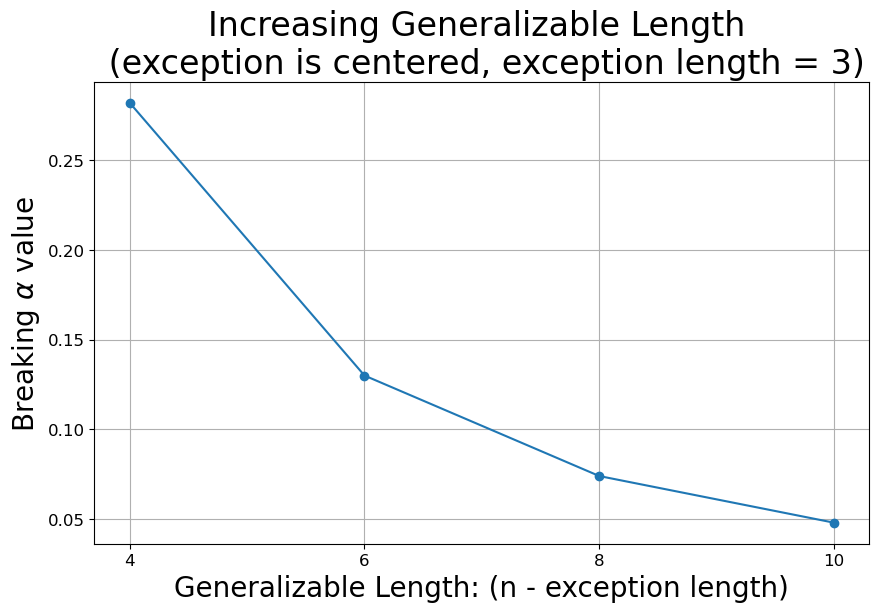

In [36]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# Set initial parameters
p = 5
q = 3
excep_len = p - q + 1
k_o_vals = np.arange(0, 0.499, 0.001)
n_vals = range(7, 15, 2)  # Testing n from 7 to 15
gen_vals = np.array(list(n_vals)) - ([excep_len]* len(n_vals))

print(n_vals)

breaking_k_os = []
n_list = []

for n in n_vals:
    # Calculate p and q to keep exception centered
    middle = math.ceil(n / 2) 
    half_excep = (p-q)/2
    q = int(middle - half_excep)
    p = int(middle + half_excep)
        
    # Find breaking k_o for this n
    for k_o in k_o_vals:
        sim = Ranking_exp(n=n, k_o=k_o, k_s=1, k_d=0, p=p, q=q, c_var=0)
        ranks = sim.calc_rank_analytic()

        # print(f"n={n}, p={p}, q={q}")  # Debug print
        
        if ranks[q-2] > ranks[p-1]:
            breaking_k_os.append(k_o)
            n_list.append(n)
            print(f"n={n}, middle={middle}, p={p}, q={q}, breaking k_o={k_o}")
            break

breaking_alphas = 1 - 2 * np.array(breaking_k_os)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(gen_vals, breaking_alphas, marker='o')
plt.title(f'Increasing Generalizable Length \n (exception is centered, exception length = 3)', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.xlabel('Generalizable Length: (n - exception length)', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel('Breaking $\u03B1$ value', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.grid(True)
plt.xticks(gen_vals, fontsize = 12)
plt.yticks(fontsize = 12)

# Save the plot
plt.savefig("breaking_alphas_exception_centered.svg", format="svg")

plt.show()


breaking_k_os [0.359, 0.001]
breaking_alphas [0.28200000000000003, 0.998]
excep_list [3, 5]
breaking_k_os [0.435, 0.37, 0.001]
breaking_alphas [0.13, 0.26, 0.998]
excep_list [3, 5, 7]
breaking_k_os [0.463, 0.442, 0.372, 0.001]
breaking_alphas [0.07399999999999995, 0.11599999999999999, 0.256, 0.998]
excep_list [3, 5, 7, 9]
breaking_k_os [0.47600000000000003, 0.468, 0.444, 0.372, 0.001]
breaking_alphas [0.04799999999999993, 0.06399999999999995, 0.11199999999999999, 0.256, 0.998]
excep_list [3, 5, 7, 9, 11]


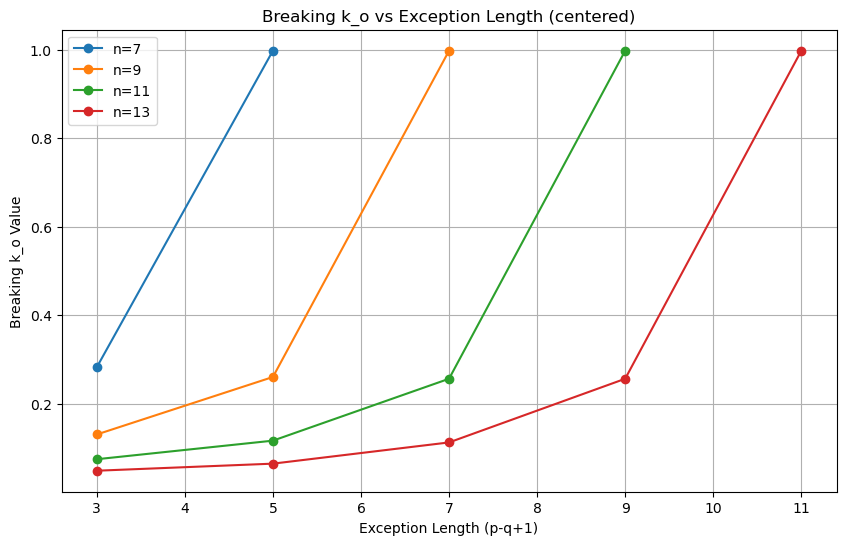

In [37]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math


plt.figure(figsize=(10, 6))

# Loop over different n values
for n in range(7, 15, 2):
    breaking_k_os = []
    breaking_alphas = []
    excep_list = []
    
    # Calculate exception lengths for this n
    excep_lens = range(3, n-1, 2)
    
    for excep_len in excep_lens:
        # Calculate p and q to keep exception centered
        middle = math.ceil(n/2)
        half_excep = (excep_len-1)/2
        q = int(middle - half_excep)
        p = int(middle + half_excep)
        
        # Find breaking k_o for this exception length
        for k_o in k_o_vals:

            sim = Ranking_exp(n=n, k_o=k_o, k_s=1, k_d=0, p=p, q=q, c_var=0)
            ranks = sim.calc_rank_analytic()

            # Debug print
            # if k_o == 0.001:
            #     print(f"n={n}, middle={middle}, p={p}, q={q}, k_o={k_o}")
            #     print(ranks)
            # if k_o == 0.498:
            #     print(f"n={n}, middle={middle}, p={p}, q={q}, k_o={k_o}")
            #     print(ranks)
            
            if ranks[q-2] > ranks[p-1]:
                # if k_o == 0.001:
                #     break
                breaking_k_os.append(k_o)
                breaking_alphas.append(1 - 2 * k_o)
                excep_list.append(excep_len)
                break
    
    # Plot for this n value
    plt.plot(excep_list, breaking_alphas, marker='o', label=f'n={n}')
    print("breaking_k_os", breaking_k_os)
    print("breaking_alphas", breaking_alphas)
    print("excep_list", excep_list)

plt.title('Breaking k_o vs Exception Length (centered)')
plt.xlabel('Exception Length (p-q+1)')
plt.ylabel('Breaking k_o Value')
plt.grid(True)
plt.legend()
plt.show()


breaking_k_os [0.359]
breaking_alphas [0.28200000000000003]
excep_list [3]
breaking_k_os [0.435, 0.37]
breaking_alphas [0.13, 0.26]
excep_list [3, 5]
breaking_k_os [0.463, 0.442, 0.372]
breaking_alphas [0.07399999999999995, 0.11599999999999999, 0.256]
excep_list [3, 5, 7]
breaking_k_os [0.47600000000000003, 0.468, 0.444, 0.372]
breaking_alphas [0.04799999999999993, 0.06399999999999995, 0.11199999999999999, 0.256]
excep_list [3, 5, 7, 9]


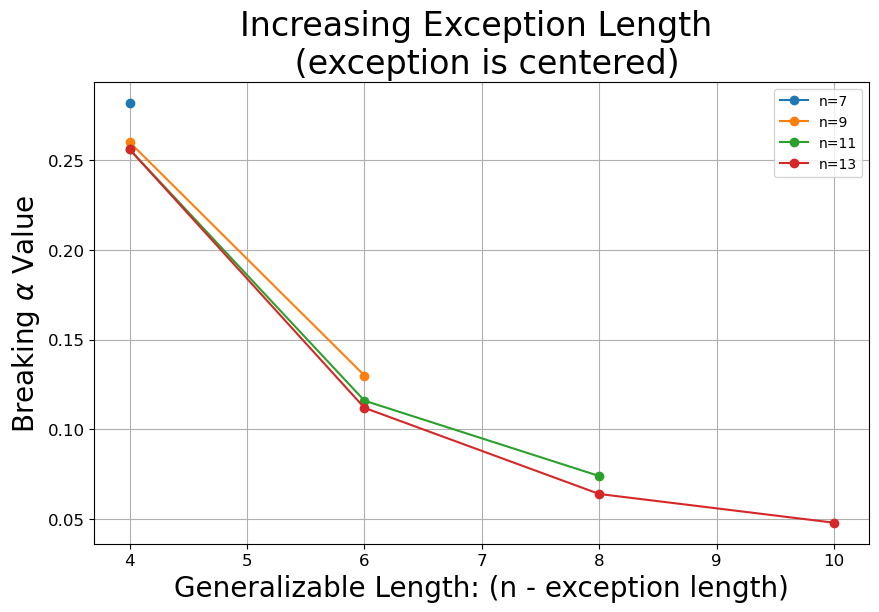

In [41]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math


plt.figure(figsize=(10, 6))

# Loop over different n values
for n in range(7, 15, 2):
    breaking_k_os = []
    breaking_alphas = []
    excep_list = []
    gen_len_list = []
    
    # Calculate exception lengths for this n
    excep_lens = range(3, n-1, 2)
    
    for excep_len in excep_lens:
        # Calculate p and q to keep exception centered
        middle = math.ceil(n/2)
        half_excep = (excep_len-1)/2
        q = int(middle - half_excep)
        p = int(middle + half_excep)
        
        # Find breaking k_o for this exception length
        for k_o in k_o_vals:

            sim = Ranking_exp(n=n, k_o=k_o, k_s=1, k_d=0, p=p, q=q, c_var=0)
            ranks = sim.calc_rank_analytic()

            # Debug print
            # if k_o == 0.001:
            #     print(f"n={n}, middle={middle}, p={p}, q={q}, k_o={k_o}")
            #     print(ranks)
            # if k_o == 0.498:
            #     print(f"n={n}, middle={middle}, p={p}, q={q}, k_o={k_o}")
            #     print(ranks)
            
            if ranks[q-2] > ranks[p-1]:
                if k_o == 0.001:
                    break
                breaking_k_os.append(k_o)
                breaking_alphas.append(1 - 2 * k_o)
                excep_list.append(excep_len)
                gen_len_list.append(n - excep_len)
                break
    
    # Plot for this n value
    plt.plot(gen_len_list, breaking_alphas, marker='o', label=f'n={n}')
    print("breaking_k_os", breaking_k_os)
    print("breaking_alphas", breaking_alphas)
    print("excep_list", excep_list)

plt.title('Increasing Exception Length \n (exception is centered)', fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.xlabel('Generalizable Length: (n - exception length)', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel('Breaking $\u03B1$ Value', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

# Save the plot
plt.savefig("breaking_alphas_increase_excep_len_exception_centered.svg", format="svg")

plt.show()
